In [4]:
import numpy as np
import os

In [5]:
data = {}
label = {}
path = './data/'
files = os.listdir(path)
for file in files:
    if os.path.splitext(file)[1] == '.npz':
        print(file)
        data[os.path.splitext(file)[0]] = np.load(path + file)["arr_0"][:, :-1]
        label[os.path.splitext(file)[0]] = np.load(path + file)["arr_0"][:, -1]
        print(data[os.path.splitext(file)[0]].shape)
        print(label[os.path.splitext(file)[0]].shape)

159928_48.npz
(1532193, 40)
(1532193,)
159920_3.npz
(1577614, 40)
(1577614,)
510500_48.npz
(1634807, 40)
(1634807,)
159920_30.npz
(1577614, 40)
(1577614,)


数据和标签保存在字典中，可以用如`data['159928_48']`来访问数据，`label['159928_48']`来访问标签。我们的目标是用data来预测label。这里的label已经是打完三分类标签的，值可以取为{-1, 0, 1}。

In [6]:
data['159928_48'][:5, :], label['159928_48'][:5]

(array([[5.228e+00, 5.229e+00, 5.230e+00, 5.231e+00, 5.232e+00, 5.234e+00,
         5.235e+00, 5.236e+00, 5.237e+00, 5.238e+00, 2.000e-02, 6.000e-01,
         1.480e+00, 3.000e-01, 4.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
         1.000e-02, 3.000e-02, 5.226e+00, 5.225e+00, 5.223e+00, 5.221e+00,
         5.219e+00, 5.217e+00, 5.216e+00, 5.215e+00, 5.214e+00, 5.210e+00,
         1.140e+00, 5.530e+00, 1.440e+00, 1.000e-02, 1.530e+00, 3.000e-02,
         1.600e-01, 4.583e+01, 1.300e-01, 4.600e-01],
        [5.228e+00, 5.229e+00, 5.230e+00, 5.231e+00, 5.232e+00, 5.234e+00,
         5.235e+00, 5.236e+00, 5.237e+00, 5.238e+00, 2.000e-02, 6.000e-01,
         1.480e+00, 3.000e-01, 4.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
         1.000e-02, 3.000e-02, 5.226e+00, 5.225e+00, 5.223e+00, 5.221e+00,
         5.219e+00, 5.217e+00, 5.216e+00, 5.215e+00, 5.214e+00, 5.210e+00,
         1.140e+00, 5.530e+00, 1.440e+00, 1.000e-02, 1.530e+00, 3.000e-02,
         1.600e-01, 4.583e+01, 1.300e-01, 4.60

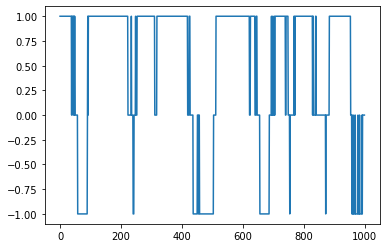

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(label['159928_48'][:1000])

In [8]:
X = data['159928_48']
y = label['159928_48']

In [12]:
### logistic regression
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [13]:
acc = softmax_reg.score(X, y)
acc

0.45801540667526874

In [14]:
softmax_reg.coef_.shape

(3, 40)

In [15]:
### random forest


In [21]:
### SVM_poly_kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC, SVC

In [17]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, C=5, coef0=1, max_iter=10000))
])

In [18]:
poly_kernel_svm_clf.fit(X, y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly', max_iter=10000))])

In [19]:
acc_SVC = poly_kernel_svm_clf.score(X, y)

In [20]:
acc_SVC

0.28571400600316016

In [22]:
RBF_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, max_iter=10000))
])

In [23]:
RBF_kernel_svm_clf.fit(X, y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5, max_iter=10000))])

In [24]:
acc_RBF = RBF_kernel_svm_clf.score(X, y)

In [25]:
acc_RBF

0.32928031912428785

In [46]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [52]:
lgm_model = lgb.LGBMClassifier(objective='multiclass', num_class=3, num_leaves=20, learning_rate=0.05, n_estimators=100)

In [48]:
gridsearch = GridSearchCV(lgm_model, param_grid={'num_leaves': [20, 30, 40, 50, 60], 'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1], 'n_estimators':[20, 30, 50, 70, 100]}, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [49]:
gridsearch.fit(X, y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5,
             estimator=LGBMClassifier(learning_rate=0.01, n_estimators=50,
                                      num_class=3, num_leaves=40,
                                      objective='multiclass'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1],
                         'n_estimators': [20, 30, 50, 70, 100],
                         'num_leaves': [20, 30, 40, 50, 60]},
             scoring='accuracy', verbose=1)

In [51]:
gridsearch.best_params_, gridsearch.best_score_

({'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 20},
 0.43902498556773883)

In [53]:
lgm_model.fit(X, y)

LGBMClassifier(learning_rate=0.05, num_class=3, num_leaves=20,
               objective='multiclass')

In [54]:
lgm_model.score(X, y)

0.504102942644954

In [9]:
### MLP
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(40, 20, 10, 3), random_state=1)
MLP_clf.fit(X, y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40, 20, 10, 3), random_state=1,
              solver='lbfgs')

In [10]:
MLP_clf.score(X, y)

0.45144378025483733